<a href="https://colab.research.google.com/github/Nikhil9490/ML_Algorithms_Revision/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
X = 6 * np.random.rand(100,1) - 3
Y = 0.5 * X**2 + 1.5*X + np.random.randn(100,1)

Text(0, 0.5, 'Y dataset')

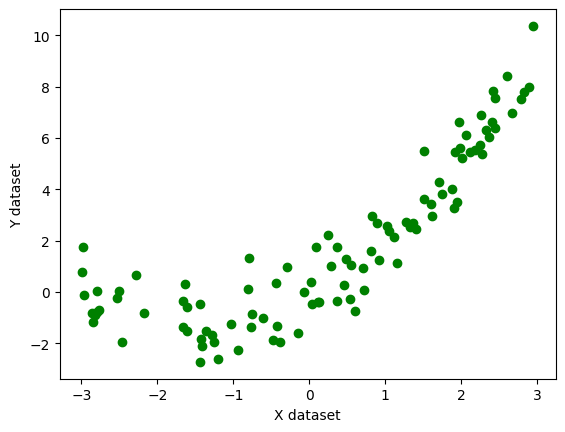

In [118]:
plt.scatter(X, Y, color = 'g')
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [120]:
#lets try simple linear regression
from sklearn.linear_model import LinearRegression

reg_1 = LinearRegression()

In [121]:
reg_1.fit(X_train, Y_train)

LinearRegression()

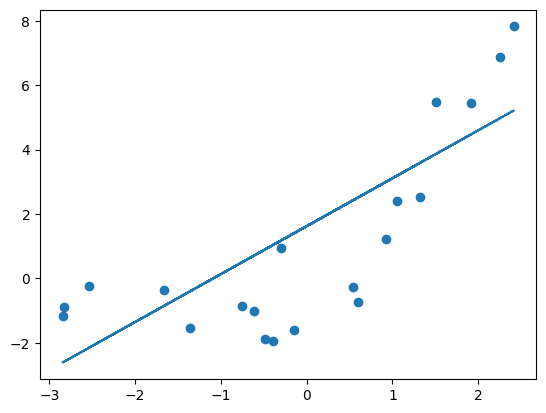

In [122]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, reg_1.predict(X_test))

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(Y_test, reg_1.predict(X_test))


3.8717035080950133

In [124]:
mean_absolute_error(Y_test, reg_1.predict(X_test))

1.7713774045326083

In [125]:
r2_score(Y_test, reg_1.predict(X_test))

0.568336581102515

WOW THAT WAS LAME!!!
what we tried was 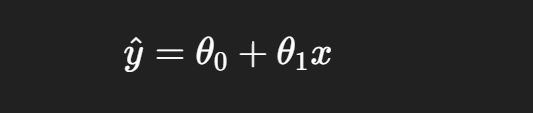

Now lets try
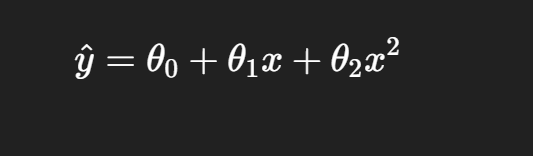

In [126]:
#applying polynomial transformation

from sklearn.preprocessing import PolynomialFeatures

In [127]:
poly = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [128]:
X_train_poly

array([[ 1.00000000e+00,  2.44210752e+00,  5.96388913e+00],
       [ 1.00000000e+00,  2.25047653e+00,  5.06464460e+00],
       [ 1.00000000e+00,  1.75389710e+00,  3.07615504e+00],
       [ 1.00000000e+00, -2.47228868e+00,  6.11221131e+00],
       [ 1.00000000e+00,  1.26713060e+00,  1.60561996e+00],
       [ 1.00000000e+00,  1.60201809e+00,  2.56646198e+00],
       [ 1.00000000e+00, -9.35729923e-01,  8.75590489e-01],
       [ 1.00000000e+00,  5.45739537e-01,  2.97831642e-01],
       [ 1.00000000e+00,  2.78935745e+00,  7.78051501e+00],
       [ 1.00000000e+00, -1.63100961e+00,  2.66019234e+00],
       [ 1.00000000e+00, -2.76910202e+00,  7.66792602e+00],
       [ 1.00000000e+00,  8.06568483e-01,  6.50552717e-01],
       [ 1.00000000e+00,  2.11425230e+00,  4.47006278e+00],
       [ 1.00000000e+00,  1.29486477e-01,  1.67667478e-02],
       [ 1.00000000e+00, -4.20950274e-01,  1.77199133e-01],
       [ 1.00000000e+00, -2.28141388e+00,  5.20484931e+00],
       [ 1.00000000e+00, -1.43523004e+00

In [129]:
X_test

array([[ 2.25695684],
       [ 1.50674543],
       [-2.53593024],
       [ 1.91767619],
       [-0.38930011],
       [-0.152075  ],
       [-0.7594579 ],
       [-1.36266855],
       [ 0.54121915],
       [-2.84541673],
       [-1.6609274 ],
       [ 0.92126714],
       [ 2.41299385],
       [-0.48297341],
       [ 1.04869736],
       [ 0.60090896],
       [-0.60808515],
       [ 1.32378242],
       [-0.29583532],
       [-2.82731563]])

In [130]:
reg_2 = LinearRegression()

In [131]:
reg_2.fit(X_train_poly, Y_train)
r2_score(Y_test, reg_2.predict(X_test_poly))

0.8749861579097702

In [135]:
print(reg_2.coef_)

[[0.        1.4875196 0.5157823]]


In [137]:
print(reg_2.intercept_)

[-0.03622837]


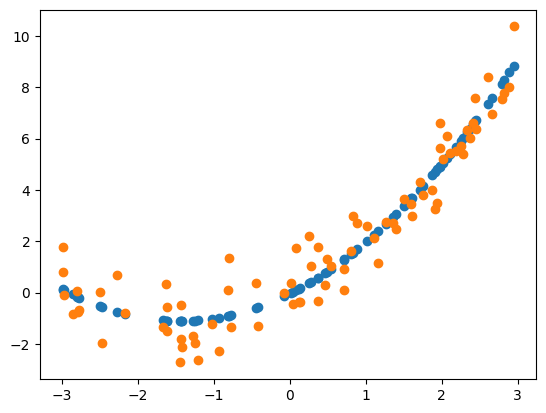

In [139]:
plt.scatter(X_train, reg_2.predict(X_train_poly))
plt.scatter(X_train, Y_train)

what if we increase degree?

In [140]:
poly2 = PolynomialFeatures(degree = 3, include_bias = True)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

In [141]:
reg_3 = LinearRegression()

In [142]:
reg_3.fit(X_train_poly2, Y_train)
r2_score(Y_test, reg_3.predict(X_test_poly2))

0.874224506914753

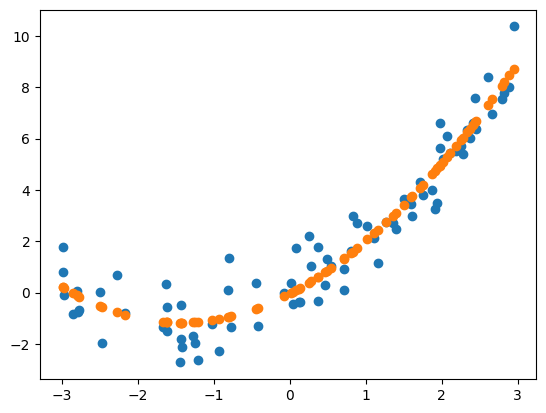

In [143]:
plt.scatter(X_train, Y_train)
plt.scatter(X_train, reg_3.predict(X_train_poly2))

not much difference. in fact, an edge to degree 2 for slightly higher accuracy.

In [146]:
#prediction for new data
X_new = np.linspace(-3,3,200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

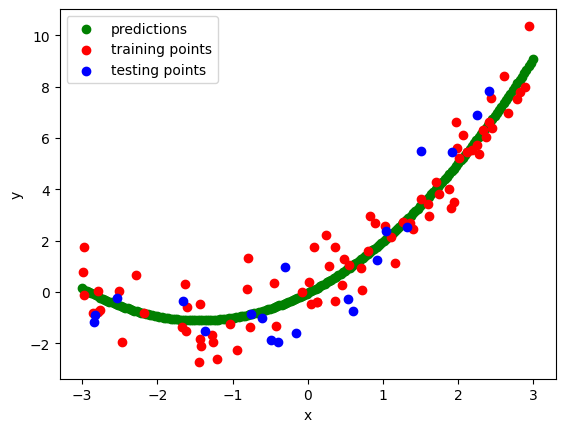

In [151]:
Y_new = reg_2.predict(X_new_poly)
plt.scatter(X_new, Y_new, color = 'green', label = 'predictions')
plt.scatter(X_train, Y_train, color = 'red', label = 'training points')
plt.scatter(X_test, Y_test, color = 'blue', label = 'testing points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()